In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
def plotLoss(data, title, tag=""):
    fig = plt.figure()
    plt.plot(data[:, 0])
    plt.title(tag + title + " loss", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("W loss", size=16)
    #plt.xlim(-50, 1000)
    #plt.savefig(title + "_losses.png")

def losses(h5file):
    # (str) h5file: name of the file containing the loss arrays
    f = h5py.File(h5file, "r")
    discriminator = np.asarray(f["discriminator"])
    discriminator_fake = np.asarray(f["Discriminator_fake"])
    discriminator_real = np.asarray(f["Discriminator_real"])
    generator = np.asarray(f["Generator"])
    f.close()
    
    plotLoss(1-discriminator, "Discriminator")
    plotLoss(1-discriminator_real, "Discriminator_real")
    plotLoss(1-discriminator_fake, "Discriminator_fake")
    plotLoss(1-generator, "Generator")

In [6]:
current = "trial5/trial5_bs_32_lr_0.005_losses.h5"

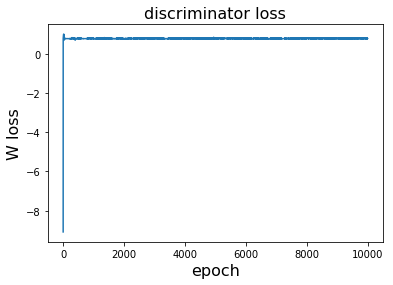

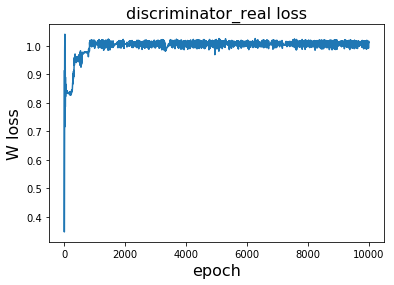

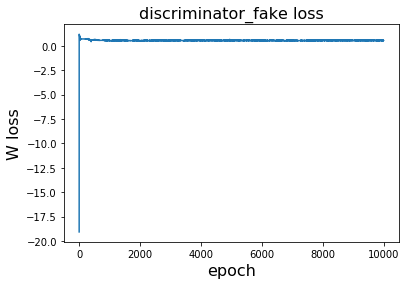

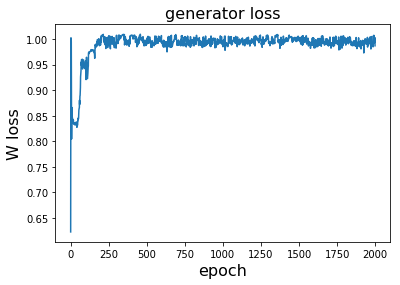

In [7]:
losses(current)

In [29]:
#losses("val_trial2_losses.h5")

In [20]:
def plotLossVal(loss, val_loss, title, tag=""):
    fig = plt.figure()
    plt.plot(loss[:, 0], label="train", color='blue', alpha=0.3)
    plt.plot(val_loss[:, 0], label="validation", color='red', alpha=0.3)
    plt.title(tag + title + " loss", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("W loss", size=16)
    plt.legend(prop={'size': 15})
    #plt.xlim(-50, 1000)
    #plt.savefig(title + "_losses_val.png")
    plt.show()

def lossesVal(h5file, h5file_val):
    # (str) h5file: name of the file containing the loss arrays
    f = h5py.File(h5file, "r")
    discriminator = np.asarray(f["discriminator"])
    discriminator_fake = np.asarray(f["discriminator_fake"])
    discriminator_real = np.asarray(f["discriminator_real"])
    generator = np.asarray(f["generator"])
    f.close()
    
    g = h5py.File(h5file_val, "r")
    val_discriminator = np.asarray(g["discriminator"])
    val_discriminator_fake = np.asarray(g["discriminator_fake"])
    val_discriminator_real = np.asarray(g["discriminator_real"])
    #generator = np.asarray(f["generator"])
    g.close()
    
    plotLossVal(1-discriminator, 1-val_discriminator, "Discriminator")
    plotLossVal(1-discriminator_real, 1-val_discriminator_real, title="Discriminator_real")
    plotLossVal(1-discriminator_fake, 1-val_discriminator_fake, title="Discriminator_fake")
    #plotLoss(generator, "generator")

In [21]:
val_current = 'trial6/val_trial6_bs_64_lr_0.002_losses.h5'

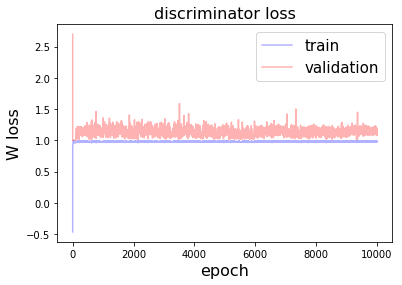

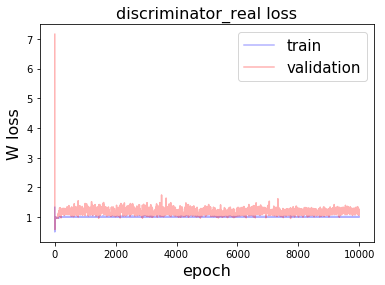

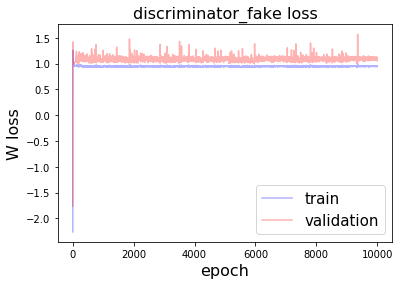

In [22]:
lossesVal(current, val_current)

In [17]:
def plotLoss2(loss1, loss2, title, tag=""):
    fig = plt.figure()
    plt.plot(loss1[:, 0], label="bs=32, lr=0.00005", color='blue', alpha=0.4)
    plt.plot(loss2[:, 0], label="bs=32, lr=0.005", color='red', alpha=0.4)
    plt.title(tag + title + " loss", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("W loss", size=16)
    plt.legend(prop={'size': 15})
    plt.xlim(-50, 1000)
    #plt.savefig("compare_bs_32_128_" + title + "_losses.png")
    plt.show()

def losses2(h5file1, h5file2):
    # (str) h5file: name of the file containing the loss arrays
    f = h5py.File(h5file1, "r")
    discriminator1 = np.asarray(f["discriminator"])
    discriminator_fake1 = np.asarray(f["discriminator_fake"])
    discriminator_real1 = np.asarray(f["discriminator_real"])
    generator1 = np.asarray(f["generator"])
    f.close()
    
    g = h5py.File(h5file2, "r")
    discriminator2 = np.asarray(g["discriminator"])
    discriminator_fake2 = np.asarray(g["discriminator_fake"])
    discriminator_real2 = np.asarray(g["discriminator_real"])
    generator2 = np.asarray(g["generator"])
    g.close()
    
    plotLoss2(1-discriminator1, 1-discriminator2, "Discriminator")
    plotLoss2(1-discriminator_real1, 1-discriminator_real2, "Discriminator_real")
    plotLoss2(1-discriminator_fake1, 1-discriminator_fake2, "Discriminator_fake")
    plotLoss2(1-generator1, 1-generator2, "Generator")

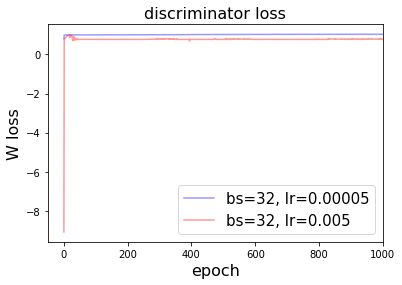

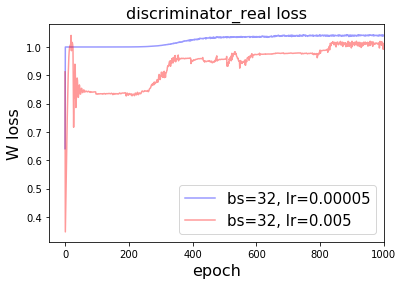

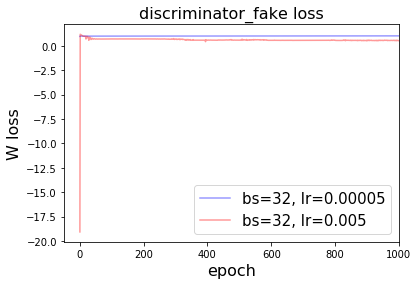

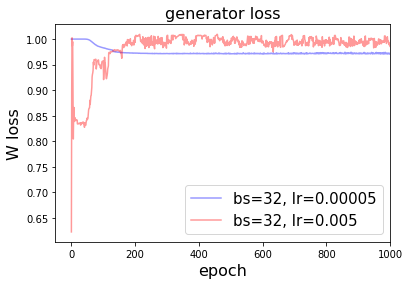

In [13]:
losses2("/nfshome/vitoriabp/Keras-GAN/wgan/trial2_batch_size_32_epochs_4000/trial2_losses.h5", current)

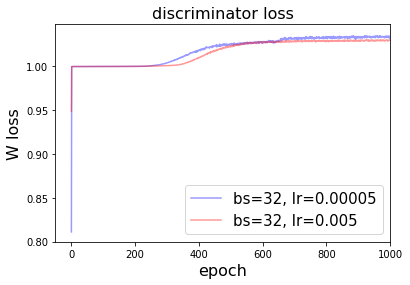

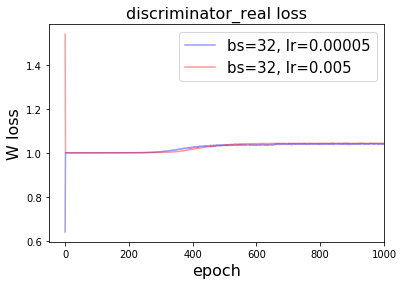

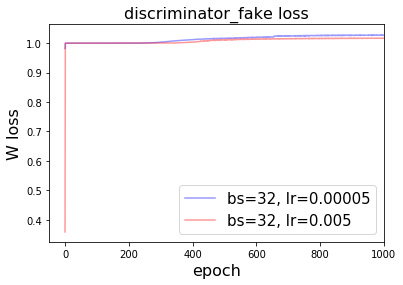

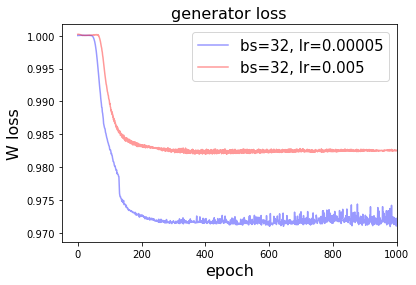

In [18]:
losses2("/nfshome/vitoriabp/Keras-GAN/wgan/trial2_batch_size_32_epochs_4000/trial2_losses.h5", "/nfshome/vitoriabp/Keras-GAN/wgan/trial3_batch_size_128_epochs_2000/trial3_bs_128_losses.h5")

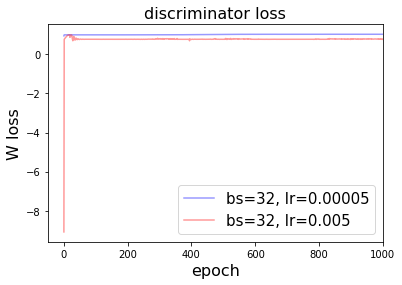

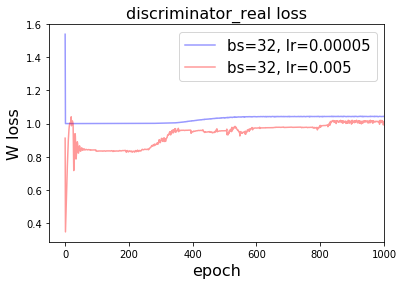

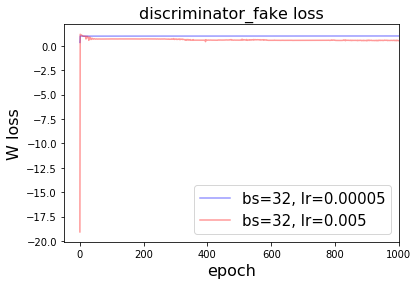

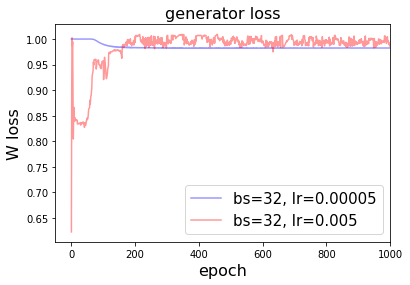

In [19]:
losses2("/nfshome/vitoriabp/Keras-GAN/wgan/trial3_batch_size_128_epochs_2000/trial3_bs_128_losses.h5", current)

In [15]:
def read_h5(h5file1):
    f = h5py.File(h5file1, "r")
    discriminator1 = np.asarray(f["discriminator"])
    discriminator_fake1 = np.asarray(f["discriminator_fake"])
    discriminator_real1 = np.asarray(f["discriminator_real"])
    generator1 = np.asarray(f["generator"])
    f.close()
    return discriminator1, discriminator_fake1, discriminator_real1, generator1

def plotLoss3(loss1, loss2, loss3, title, tag=""):
    fig = plt.figure()
    plt.plot(loss1[:, 0], label="bs=32, lr=0.00005", color='blue', alpha=0.4)
    plt.plot(loss2[:, 0], label="bs=32, lr=0.005", color='red', alpha=0.4)
    plt.plot(loss3[:, 0], label="bs=128, lr=0.00005", color='green', alpha=0.4)
    plt.title(tag + title + " loss", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("W loss", size=16)
    plt.legend(prop={'size': 15})
    plt.xlim(-50, 1000)
    #plt.savefig("compare_bs_32_128_" + title + "_losses.png")
    plt.show()

def losses3(h5file1, h5file2, h5file3):
    # (str) h5file: name of the file containing the loss arrays
    discriminator1, discriminator_fake1, discriminator_real1, generator1 = read_h5(h5file1)
    discriminator2, discriminator_fake2, discriminator_real2, generator2 = read_h5(h5file2)
    discriminator3, discriminator_fake3, discriminator_real3, generator3 = read_h5(h5file3)
    
    plotLoss3(1-discriminator1, 1-discriminator2, 1-discriminator3, "Discriminator")
    plotLoss3(1-discriminator_real1, 1-discriminator_real2, 1-discriminator_real3, "Discriminator_real")
    plotLoss3(1-discriminator_fake1, 1-discriminator_fake2, 1-discriminator_fake3, "Discriminator_fake")
    plotLoss3(1-generator1, 1-generator2, 1-generator2, "Generator")

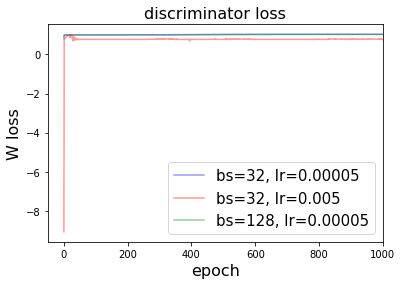

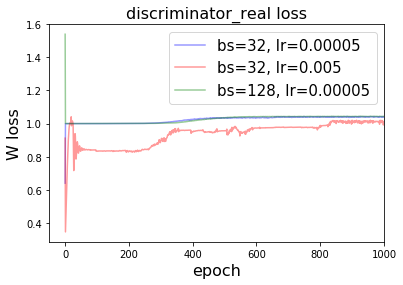

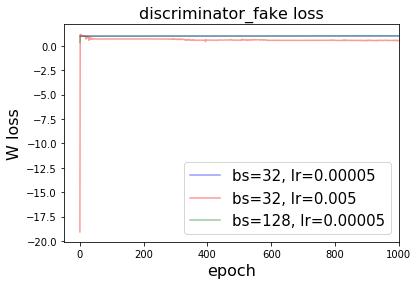

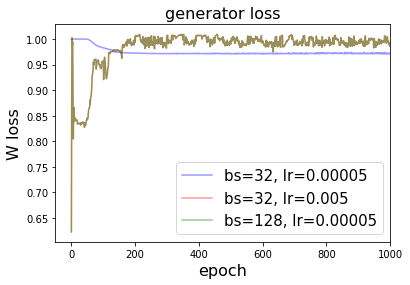

In [16]:
losses3("/nfshome/vitoriabp/Keras-GAN/wgan/trial2_batch_size_32_epochs_4000/trial2_losses.h5", current, "/nfshome/vitoriabp/Keras-GAN/wgan/trial3_batch_size_128_epochs_2000/trial3_bs_128_losses.h5")

In [20]:
def plotRealFake(real, fake, title, tag=""):
    fig = plt.figure()
    plt.plot(real[:, 0], label="real", color='blue', alpha=0.5)
    plt.plot(fake[:, 0], label="fake", color='red', alpha=0.5)
    plt.title(tag + title + " loss", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("W loss", size=16)
    plt.legend(prop={'size': 15})
    #plt.savefig(title + "_losses_real_fake.png")
    plt.xlim(-50, 2000)
    plt.ylim(0.5, 1.5)
    plt.show()

def lossesRealFake(h5file):
    # (str) h5file: name of the file containing the loss arrays
    f = h5py.File(h5file, "r")
    discriminator = np.asarray(f["discriminator"])
    discriminator_fake = np.asarray(f["discriminator_fake"])
    discriminator_real = np.asarray(f["discriminator_real"])
    generator = np.asarray(f["generator"])
    f.close()
    
    plotRealFake(1-discriminator_real, 1-discriminator_fake, "Discriminator")

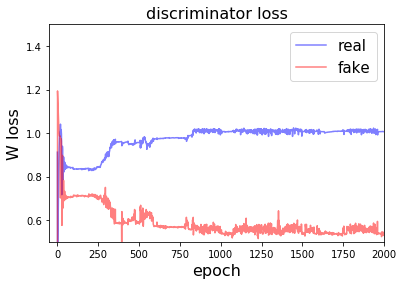

In [21]:
lossesRealFake(current)